In [2]:
import os
import numpy as np
import pandas as pd
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/FVtrain_5FP_fold4_1.csv') #เปลี่ยนไฟล์
dataframe = dataframe.drop(['Unnamed: 0'], axis=1)
dataframe

,0,1,2,3,4,5,6,7,8,9,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,-0.052231,-0.088888,-0.198010,-0.166597,-0.098973,-0.013442,-0.167427,0.349362,0.009032,0.553631,...,-0.172660,0.410697,0.248255,-0.028798,0.073010,0.808035,Abnormal,P31,FP-B,AB01
1,-0.210115,0.816273,0.240054,0.309247,0.133062,0.097428,0.790255,0.496908,-0.124766,-0.092882,...,-0.102762,0.182280,0.409014,-0.128085,0.158914,-0.058238,Abnormal,P1,FP-A,AB01
2,-0.183944,0.631293,0.112405,0.339750,0.181902,0.106688,0.877962,0.156163,-0.201337,-0.131349,...,0.052766,0.223142,0.424080,-0.049784,-0.106292,0.090639,Abnormal,P2,FP-A,AB01
3,-0.175725,-0.133661,-0.172570,-0.101319,-0.149359,0.038068,-0.213045,0.470231,-0.069968,0.603072,...,-0.193646,-0.076549,0.081426,-0.012682,0.203793,0.696491,Abnormal,P42,FP-B,AB01
4,-0.103514,-0.062034,-0.144713,-0.120539,-0.014255,0.322050,-0.147671,0.640609,-0.073623,1.000547,...,-0.203206,0.322323,0.408586,0.029039,0.175108,1.233018,Abnormal,P41,FP-B,AB01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594,-0.075651,-0.205475,-0.214040,-0.145242,-0.134556,-0.032651,-0.195591,0.235365,-0.211545,0.534328,...,-0.191993,0.628379,0.776129,-0.102233,-0.103778,0.800191,Normal,P32,FP-B,Normal
4595,-0.212692,-0.158117,-0.129940,-0.167883,-0.017740,-0.004025,-0.185337,0.349680,-0.050582,0.899695,...,-0.115886,-0.060851,0.347689,0.041572,0.423671,0.949745,Normal,P42,FP-B,Normal
4596,-0.199610,0.102197,0.447225,1.084164,-0.000168,-0.160631,0.576264,0.003632,0.623125,-0.195416,...,0.625296,-0.169083,-0.152302,0.803941,0.785957,-0.090171,Normal,P52,FP-C,Normal
4597,-0.208897,-0.031065,0.175853,1.082890,0.077500,-0.175866,0.206401,-0.084385,0.607617,0.347168,...,0.763576,-0.062973,-0.151034,1.018982,0.477069,-0.069457,Normal,P61,FP-C,Normal


In [3]:
X = dataframe.iloc[:,0:2048]
y = dataframe.iloc[:,2051]
print(X.shape)
print(y.shape)

(4599, 2048)
(4599,)


In [4]:
y[0]

'AB01'

# Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

In [8]:
n_estimators = [400]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100] 

forest = RandomForestClassifier(random_state = 1)


hyperF ={'n_estimators' : n_estimators, 'max_depth' : max_depth, 'min_samples_split' : min_samples_split}
# hyperF ={'max_depth' : max_depth, 'min_samples_split' : min_samples_split}

gridF = GridSearchCV(forest, hyperF, cv = 10, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X, y)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


In [9]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(bestF.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.679058,0.011614,"{'max_depth': 5, 'min_samples_split': 2, 'n_es..."
1,0.678188,0.012209,"{'max_depth': 5, 'min_samples_split': 5, 'n_es..."
2,0.679276,0.011805,"{'max_depth': 5, 'min_samples_split': 10, 'n_e..."
3,0.679276,0.012199,"{'max_depth': 5, 'min_samples_split': 15, 'n_e..."
4,0.676667,0.011007,"{'max_depth': 5, 'min_samples_split': 100, 'n_..."
5,0.687105,0.010833,"{'max_depth': 8, 'min_samples_split': 2, 'n_es..."
6,0.686452,0.010231,"{'max_depth': 8, 'min_samples_split': 5, 'n_es..."
7,0.687106,0.010717,"{'max_depth': 8, 'min_samples_split': 10, 'n_e..."
8,0.686017,0.010887,"{'max_depth': 8, 'min_samples_split': 15, 'n_e..."
9,0.680798,0.010481,"{'max_depth': 8, 'min_samples_split': 100, 'n_..."


In [10]:
# examine the first result
print("**examine the first result","\n")

print(bestF.cv_results_['params'][0])
print(bestF.cv_results_['mean_test_score'][0])

# print the array of mean scores only
print("\n","**print the array of mean scores only","\n")

grid_mean_scores = bestF.cv_results_['mean_test_score']
print(grid_mean_scores)

# examine the best model
print("\n","**examine the best model","\n")

print(bestF.best_score_)
print(bestF.best_params_)
print(bestF.best_estimator_)

**examine the first result 

{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 400}
0.6790584446338921

 **print the array of mean scores only 

[0.67905844 0.67818841 0.67927631 0.67927631 0.67666714 0.68710476
 0.68645212 0.68710571 0.68601686 0.68079805 0.70123757 0.69971678
 0.69689069 0.69645354 0.6821024  0.70297765 0.70276073 0.70123899
 0.69775931 0.68253813 0.70580421 0.70449986 0.70254334 0.69993275
 0.68275552]

 **examine the best model 

0.7058042057402671
{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 400}
RandomForestClassifier(max_depth=30, n_estimators=400, random_state=1)


In [11]:
#Print the tured parameters and score
print("Tuned Decision Tree Parameters: {}".format(bestF.best_params_))
print("Best score is {}".format(bestF.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 400}
Best score is 0.7058042057402671


# setting parameters

In [12]:
forestOpt = RandomForestClassifier(random_state = 1, max_depth = 30, n_estimators = 400, min_samples_split = 2) #เปลี่ยนตาม cell 8
             
modelOpt = forestOpt.fit(X, y)# 

In [13]:
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/FVvalidation_5FP_RF_5FP_fold4_1.csv') #เปลี่ยนชื่อไฟล์ Validation

In [14]:
dataframe

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,0,-0.115736,0.613705,0.095950,0.100774,0.206195,0.104361,0.018728,0.567448,-0.102401,...,-0.097234,0.427765,1.183713,-0.011584,0.445677,0.135371,Abnormal,P2,FP-A,AB01
1,1,-0.099748,-0.031424,-0.139862,-0.050194,-0.209903,0.293073,-0.179871,0.787052,-0.009670,...,-0.190293,0.758117,0.929839,-0.113138,0.158252,0.453954,Abnormal,P31,FP-B,AB01
2,2,-0.237943,0.183289,-0.010901,-0.076555,-0.088108,0.099274,0.072831,0.359815,-0.205323,...,0.042460,0.134129,0.259397,-0.090315,0.101517,0.049131,Abnormal,P1,FP-A,AB01
3,3,-0.203237,0.044652,0.370853,0.694867,-0.070497,-0.187181,0.870876,-0.143329,0.416199,...,1.247038,-0.147866,-0.179570,1.048022,0.240224,-0.101802,Abnormal,P51,FP-C,AB01
4,4,-0.191811,-0.072946,-0.085976,0.125813,-0.096506,-0.142610,0.268876,-0.054955,-0.060040,...,0.114360,-0.090623,0.002451,-0.133159,-0.018142,0.082837,Abnormal,P1,FP-A,AB02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,653,-0.206319,0.265064,-0.033714,0.024777,-0.125066,-0.107904,0.286079,0.440219,-0.124846,...,-0.066776,-0.036920,0.271357,0.071217,0.425435,0.131374,Normal,P31,FP-B,Normal
654,654,-0.231396,-0.212773,-0.221579,-0.188345,0.009606,0.069724,-0.217942,0.101819,-0.075638,...,-0.172730,-0.125279,0.211834,-0.134712,-0.157642,0.063311,Normal,P32,FP-B,Normal
655,655,-0.174268,0.075763,0.116368,0.592806,-0.048778,-0.186965,0.559151,0.248072,0.241843,...,0.559196,-0.094823,0.091311,0.548917,1.081330,0.079756,Normal,P52,FP-C,Normal
656,656,-0.175041,0.131510,0.300820,0.970008,-0.078632,0.035015,0.994904,-0.182074,0.640151,...,0.909984,-0.072317,-0.171147,0.542109,0.039216,-0.145956,Normal,P61,FP-C,Normal


In [15]:
X_test = dataframe.iloc[:,1:2049]
y_test = dataframe.iloc[:,2052]
print(X_test.shape)
print(y_test.shape)

(658, 2048)
(658,)


In [16]:
y_test

0        AB01
1        AB01
2        AB01
3        AB01
4        AB02
        ...  
653    Normal
654    Normal
655    Normal
656    Normal
657    Normal
Name: Sub_class, Length: 658, dtype: object

In [17]:
y_pred = modelOpt.predict(X_test)

In [18]:
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))#performance

[[  0   3   0   0   0   0   0   0   0   0   0   0   0   0  29]
 [  1  11   0   0   0   0   0   0   0   0   0   0   0   0  24]
 [  0   3   0   0   0   0   0   0   0   0   0   0   0   0   9]
 [  0   0   0   4   0   0   0   0   0   0   0   0   0   1  19]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  12]
 [  0   0   0   0   0   1   0   0   0   0   0   0   0   0   9]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   8]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  15]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  18]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   4]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  11]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   4]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  12]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  12  18]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 430]]
              precision    recall  f1-score   support


/home/kannika/miniconda3/envs/AI/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kannika/miniconda3/envs/AI/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kannika/miniconda3/envs/AI/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 21.5, 'Predicted label')

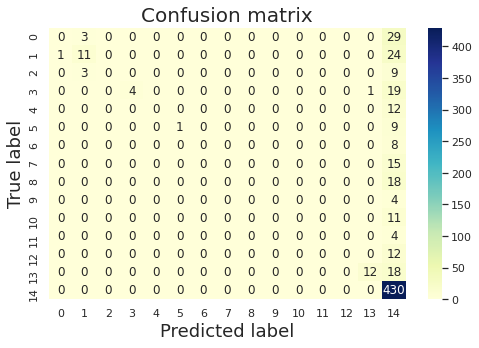

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

In [17]:
#TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
#print(TN, FP, FN, TP)

135 93 24 407


# Save Model

In [20]:
#Save Model

import pickle
os.chdir('/media/tohn/SSD/ModelTrainByImages/R2_4/models/')
filename = "modelrf_5FP_15AB_fold4_1.pkl" #เปลี่ยนชื่อไฟล์ Train random forest
with open(filename, 'wb') as file:
    pickle.dump(modelOpt, file)

In [ ]:
# #load model

# with open(filename, 'rb') as file:
#     model = pickle.load(file)